# RNN을 이용한 인코더-디코더
- RNN의 다 대 일(many-to-one) 구조$→$ 텍스트 분류
- 다 대 다(many-to-many) 구조 $→$ 개체명 인식이나 품사 태깅

<br>

#### 인코더 - 디코더
- 하나의 RNN을 인코더. 또 다른 하나의 RNN을 디코더라는 모듈로 명명하고,

  **두 개의 RNN을 연결해서 사용하는 인코더-디코더 구조**
- 인코더-디코더 구조는 주로 입력 문장과 출력 문장의 길이가 다를 경우에 사용
  - 번역기나 텍스트 요약
  - 영어 문장을 한국어 문장으로 번역한다고 하였을 때, 입력 문장인 영어 문장과 번역된 결과인 한국어 문장의 길이는 똑같을 필요가 없음
  * 텍스트 요약의 경우에는 출력 문장이 요약된 문장이므로 입력 문장보다는 당연히 길이가 짧음



<br>

<br>

## 시퀀스-투-시퀀스(Sequence-to-Sequence, seq2seq)
* **시퀀스-투-시퀀스(Sequence-to-Sequence, seq2seq)는 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 다양한 분야에서 사용되는 모델**
  * 입력 시퀀스와 출력 시퀀스를 각각 질문과 대답으로 구성하면 챗봇
  * 입력 시퀀스와 출력 시퀀스를 각각 입력 문장과 번역 문장으로 만들면 번역기


<br>

### 시퀀스-투-시퀀스(Sequence-to-Sequence)
- seq2seq는 번역기에서 대표적으로 사용되는 모델
  * RNN을 어떻게 조립했느냐에 따라서 seq2seq라는 구조 생성

![시퀀스투시퀀스[1].PNG](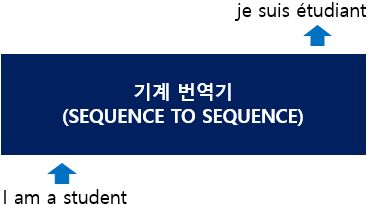)

<br>

* 그림은 seq2seq 모델로 만들어진 번역기가 'I am a student'라는 영어 문장을 입력받아서, 'je suis étudiant'라는 프랑스 문장을 출력

<br>

![seq2seq모델11[1].PNG](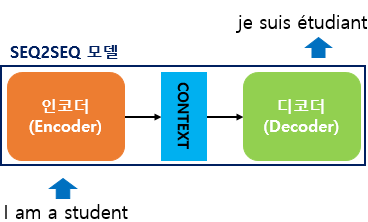)

<br>

* **seq2seq는 크게 인코더와 디코더라는 두 개의 모듈로 구성**
* **인코더 : 입력 문장의 모든 단어들을 순차적으로 입력받은 뒤에 마지막에 이 모든 단어 정보들을 압축해서 하나의 컨텍스트 벡터(context vector)를 생성**
* **입력 문장의 정보가 하나의 컨텍스트 벡터로 모두 압축되면 인코더는 컨텍스트 벡터를 디코더로 전송**
* **디코더는 컨텍스트 벡터를 받아서 번역된 단어를 한 개씩 순차적으로 출력**

![컨텍스트_벡터[1].PNG](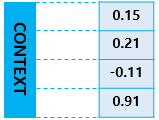)

<br>

![인코더디코더모델[1].PNG](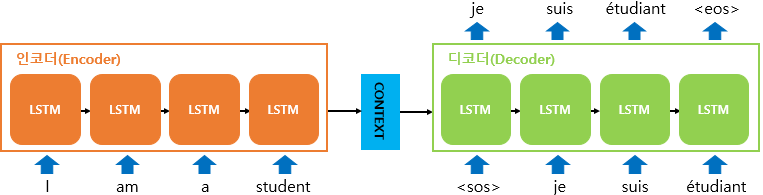)

* 인코더 아키텍처와 디코더 아키텍처의 내부는 두 개의 RNN 아키텍처
  * (성능 문제로 인해 실제로는 바닐라 RNN이 아니라 LSTM 셀 또는 GRU 셀들로 구성)
* **인코더 : 입력 문장을 받는 RNN 셀**
  * **입력 문장은 단어 토큰화를 통해서 단어 단위로 쪼개지고 단어 토큰 각각은 RNN 셀의 각 시점의 입력값으로 사용**
  * **인코더 RNN 셀은 모든 단어를 입력받은 뒤에 인코더 RNN 셀의 마지막 시점의 은닉 상태 (컨텍스트 벡터)를 디코더 RNN 셀로 넘김**
  * **컨텍스트 벡터는 디코더 RNN 셀의 첫번째 은닉 상태에 사용**
* **디코더 : 출력 문장을 출력하는 RNN 셀**  
  * 디코더는 기본적으로 RNNLM(RNN Language Model)
  * 디코더는 초기 입력으로 문장의 시작을 의미하는 심볼 \<sos\>가 사용
  * 디코더는 \<sos\>가 입력되면, 다음에 등장할 확률이 높은 단어를 예측
  * 첫번째 시점(time step)의 디코더 RNN 셀은 다음에 등장할 단어로 je를 예측
  * 첫번째 시점의 디코더 RNN 셀은 예측된 단어 je를 다음 시점의 RNN 셀의 입력으로 입력
  * 두번째 시점의 디코더 RNN 셀은 입력된 단어 je로부터 다시 다음에 올 단어인 suis를 예측
  * 다시 이것을 다음 시점의 RNN 셀의 입력으로 전송
  * **디코더는 이런 식으로 기본적으로 다음에 올 단어를 예측하고, 그 예측한 단어를 다음 시점의 RNN 셀의 입력으로 넣는 행위를 반복**
  * **이 행위는 문장의 끝을 의미하는 심볼인 \<eos\>가 다음 단어로 예측될 때까지 반복**

<br>

* **seq2seq는 훈련 과정과 테스트 과정(또는 실제 번역기를 사람이 쓸 때)의 작동 방식이 상이**
  * **훈련 과정에서는 인코더가 디코더에게 보낸 컨텍스트 벡터와**
  
    **실제 정답 상황인 \<sos\> je suis étudiant를 입력 받았을 때,**
    
    **je suis étudiant \<eos\>가 나와야 된다고 정답을 알려주면서 훈련**
  * **반면 테스트 과정에서는**
    
    **오직 컨텍스트 벡터와 \<sos\> 만을 입력으로 받은 후에 다음에 올 단어를 예측하고**,
    
    **그 단어를 다음 시점의 RNN 셀의 입력으로 넣는 행위를 반복**
* **즉, 앞서 설명한 과정과 위의 그림은 테스트 과정에 해당**

<br>

![단어토큰들이[1].PNG](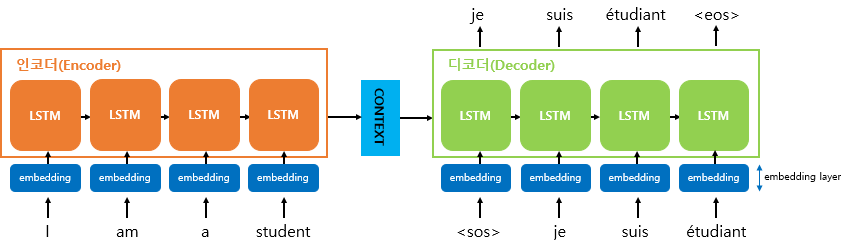)

* **seq2seq에서 사용되는 모든 단어들은 임베딩 벡터로 변환 후 입력으로 사용**
* 위 그림은 모든 단어에 대해서 임베딩 과정을 거치게 하는 단계인 임베딩 층(embedding layer)의 모습

<br>

![임베딩벡터[1].PNG](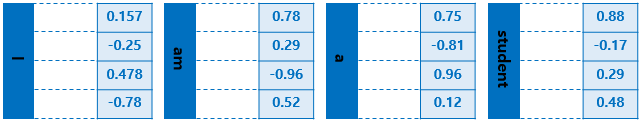)

* I, am, a, student라는 단어들에 대한 임베딩 벡터는 위와 같은 모습
  * **하나의 RNN 셀은 각각의 시점(time step)마다 두 개의 입력을 받음**

  ![rnn근황[1].PNG](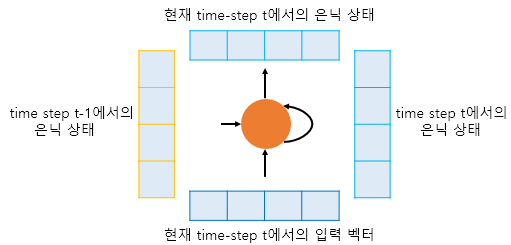)

* **현재 시점(time step)을 t라고 할 때, RNN 셀은 t-1에서의 은닉 상태와 t에서의 입력 벡터를 입력으로 받고, t에서의 은닉 상태를 생성**

  * **이때 t에서의 은닉 상태는 바로 위에 또 다른 은닉층이나 출력층이 존재할 경우에는 위의 층으로 보내거나, 필요없으면 값을 무시**
  
  * **그리고 RNN 셀은 다음 시점에 해당하는 t+1의 RNN 셀의 입력으로 현재 t에서의 은닉 상태를 입력으로 전송**

* **이런 구조에서 현재 시점 t에서의 은닉 상태는 과거 시점의 동일한 RNN 셀에서의 모든 은닉 상태의 값들의 영향을 누적해서 받아온 값**

  **때문에 앞서 언급했던 컨텍스트 벡터는 사실 인코더에서의 마지막 RNN 셀의 은닉 상태값을 말하는 것이며,**

  **이는 입력 문장의 모든 단어 토큰들의 정보를 요약해서 담고있음**

<br>


* 디코더는 인코더의 마지막 RNN 셀의 은닉 상태인 컨텍스트 벡터를 첫번째 은닉 상태의 값으로 사용
* 디코더의 첫번째 RNN 셀은 이 첫번째 은닉 상태의 값과,

  현재 t에서의 입력값인 \<sos\>로부터, 다음에 등장할 단어를 예측
  
  그리고 이 예측된 단어는 다음 시점인 t+1 RNN에서의 입력값이 되고, 이 t+1에서의 RNN 또한 이 입력값과 t에서의 은닉 상태로부터 t+1에서의 출력 벡터. 즉, 또 다시 다음에 등장할 단어를 예측


![decodernextwordprediction[1].PNG](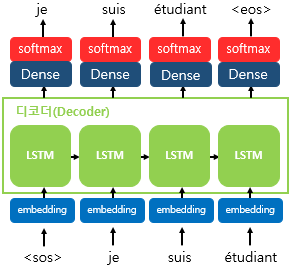)

* **seq2seq 모델은 선택될 수 있는 모든 단어들로부터 하나의 단어를 골라서 예측**
  
  이를 예측하기 위해서 쓸 수 있는 함수는 소프트맥스 함수
  
  **디코더에서 각 시점(time step)의 RNN 셀에서 출력 벡터가 나오면, 해당 벡터는 소프트맥스 함수를 통해 출력 시퀀스의 각 단어별 확률값을 반환하고, 디코더는 출력 단어를 결정**

<br>

* seq2seq는 어떻게 구현하느냐에 따라서 충분히 더 복잡해질 수 있음
* 컨텍스트 벡터를 디코더의 초기 은닉 상태로만 사용할 수도 있고,

  거기서 더 나아가 컨텍스트 벡터를 디코더가 단어를 예측하는 매 시점마다 하나의 입력으로 사용할 수도 있으며
  
  더 나아가면 어텐션 메커니즘이라는 방법을 통해 지금 알고있는 컨텍스트 벡터보다 더욱 문맥을 반영할 수 있는 컨텍스트 벡터를 구하여
  
  매 시점마다 하나의 입력으로 사용할 수도 있음

<br>

### 문자 레벨 기계 번역기(Character-Level Neural Machine Translation) 구현

시물 링크 : https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html

- 실제 성능이 좋은 기계 번역기를 구현하려면 방대한 데이터가 필요
* seq2seq를 실습해보는 수준에서 아주 간단한 기계 번역기를 구축
* **기계 번역기를 훈련시키기 위해서는 훈련 데이터로 병렬 코퍼스(parallel corpus)가 필요**
  - 병렬 코퍼스란, 두 개 이상의 언어가 병렬적으로 구성된 코퍼스를 의미

다운로드 링크 : http://www.manythings.org/anki

<br>

#### 병렬 코퍼스 데이터에 대한 이해와 전처리

* 태깅 작업의 병렬 데이터와 seq2seq가 사용하는 병렬 데이터는 성격이 조금 상이
* **병렬 코퍼스는 쌍이 된다고 해서 길이가 같지않음**

  - 실제 번역기를 생각해보면 구글 번역기에 '나는 학생이다.'라는 토큰의 개수가 2인 문장을 넣었을 때 'I am a student.'라는 토큰의 개수가 4인 문장이 나오는 것과 같은 이치
* **seq2seq는 기본적으로 입력 시퀀스와 출력 시퀀스의 길이가 다를 수 있다고 가정**

In [ ]:
import os
import shutil
import zipfile
import requests

import pandas as pd
import tensorflow as tf
import urllib3
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
! wget http://www.manythings.org/anki/fra-eng.zip

--2024-02-11 13:55:25--  http://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7833145 (7.5M) [application/zip]
Saving to: ‘fra-eng.zip’

fra-eng.zip         100%[===================>]   7.47M  --.-KB/s    in 0.1s    

2024-02-11 13:55:25 (52.2 MB/s) - ‘fra-eng.zip’ saved [7833145/7833145]



In [ ]:
! unzip fra-eng.zip -d fra-eng

Archive:  fra-eng.zip
  inflating: fra-eng/_about.txt      
  inflating: fra-eng/fra.txt         


In [ ]:
lines = pd.read_csv('./fra-eng/fra.txt', names=['src', 'tar', 'lic'], sep='\t')
del lines['lic']
print('전체 샘플의 개수 :',len(lines))

전체 샘플의 개수 : 229803


In [ ]:
lines = lines.loc[:, 'src':'tar']
lines = lines[0:60000]
lines.sample(10)

,src,tar
15755,I rang the bell.,J'ai fait résonner la cloche.
83,Buy it.,Achetez-la !
52168,This is a great idea.,C'est une idée merveilleuse.
50932,Nobody deserves that.,Personne ne mérite cela.
21442,I'm baking bread.,Je cuis du pain.
41663,I'd like some shoes.,J'aimerais des chaussures.
27038,I made this chair.,J'ai fait cette chaise.
5342,I must hurry.,Je dois me hâter.
10173,You stay here.,Vous restez ici.
16346,Is anybody home?,Y a-t-il quelqu'un ?


<br>

* 번역 문장에 해당되는 프랑스어 데이터는 **시작을 의미하는 심볼 `<sos>`과 종료를 의미하는 심볼 `<eos>`을 넣어주어야 함**
  - 여기서는 `<sos>`와 `<eos>` 대신 `\t`를 시작 심볼, `\n`을 종료 심볼로 간주하여 추가

In [ ]:
lines.tar = lines.tar.apply(lambda x : '\t '+ x + ' \n')
lines.sample(10)

,src,tar
4278,Tom'll quit.,\t Tom va démissionner. \n
37951,When do you use it?,\t Quand l'employez-vous ? \n
9811,We have to go.,\t Il nous faut partir. \n
34204,I was a bit afraid.,\t J'avais un peu peur. \n
24260,What do you like?,\t Qu'apprécies-tu ? \n
35692,See you guys later.,"\t À plus tard, tout le monde ! \n"
40864,I haven't eaten yet.,\t Je n'ai pas encore mangé. \n
43925,They seemed content.,\t Elles semblaient satisfaites. \n
16326,I've had enough.,\t J'en ai assez avalé. \n
81,Attack!,\t À l'attaque ! \n


<br>

#### 문자 집합 생성 & 인베딩
- 단어 집합이 아니라 문자 집합이라고 하는 이유는 토큰 단위가 단어가 아니라 문자이기 때문

In [ ]:
src_vocab = set()
for line in lines.src:
    for char in line:
        src_vocab.add(char)

tar_vocab = set()
for line in lines.tar:
    for char in line:
        tar_vocab.add(char)

In [ ]:
src_vocab_size = len(src_vocab)+1
tar_vocab_size = len(tar_vocab)+1

print('source 문장의 char 집합 :',src_vocab_size)
print('target 문장의 char 집합 :',tar_vocab_size)

source 문장의 char 집합 : 80
target 문장의 char 집합 : 104


<br>

- 영어와 프랑스어는 각각 79개와 105개의 문자가 존재
  - 이 중에서 인덱스를 임의로 부여하여 일부만 출력

In [ ]:
src_vocab = sorted(list(src_vocab))
tar_vocab = sorted(list(tar_vocab))

print(src_vocab[45:75])
print(tar_vocab[45:75])

['W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
['T', 'U', 'V', 'W', 'X', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x']


<br>

- 각 문자에 인덱스를 부여

In [ ]:
src_to_index = dict([(word, i+1) for i, word in enumerate(src_vocab)])
tar_to_index = dict([(word, i+1) for i, word in enumerate(tar_vocab)])

print(src_to_index)
print(tar_to_index)

{' ': 1, '!': 2, '"': 3, '$': 4, '%': 5, '&': 6, "'": 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17, '6': 18, '7': 19, '8': 20, '9': 21, ':': 22, '?': 23, 'A': 24, 'B': 25, 'C': 26, 'D': 27, 'E': 28, 'F': 29, 'G': 30, 'H': 31, 'I': 32, 'J': 33, 'K': 34, 'L': 35, 'M': 36, 'N': 37, 'O': 38, 'P': 39, 'Q': 40, 'R': 41, 'S': 42, 'T': 43, 'U': 44, 'V': 45, 'W': 46, 'X': 47, 'Y': 48, 'Z': 49, 'a': 50, 'b': 51, 'c': 52, 'd': 53, 'e': 54, 'f': 55, 'g': 56, 'h': 57, 'i': 58, 'j': 59, 'k': 60, 'l': 61, 'm': 62, 'n': 63, 'o': 64, 'p': 65, 'q': 66, 'r': 67, 's': 68, 't': 69, 'u': 70, 'v': 71, 'w': 72, 'x': 73, 'y': 74, 'z': 75, 'é': 76, 'ï': 77, '’': 78, '€': 79}
{'\t': 1, '\n': 2, ' ': 3, '!': 4, '"': 5, '$': 6, '%': 7, '&': 8, "'": 9, '(': 10, ')': 11, ',': 12, '-': 13, '.': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, '?': 26, 'A': 27, 'B': 28, 'C': 29, 'D': 30, 'E': 31, 'F': 32, 'G': 33, 'H': 3

<br>

- 인덱스가 부여된 문자 집합으로부터 갖고있는 훈련 데이터에 정수 인코딩을 수행

In [ ]:
encoder_input = []
for line in lines.src:
  encoded_line = []

  for char in line:
    encoded_line.append(src_to_index[char])

  encoder_input.append(encoded_line)

print('source 문장의 정수 인코딩 :',encoder_input[:5])

source 문장의 정수 인코딩 : [[30, 64, 10], [30, 64, 10], [30, 64, 10], [30, 64, 10], [31, 58, 10]]


In [ ]:
decoder_input = []
for line in lines.tar:
  encoded_line = []

  for char in line:
    encoded_line.append(tar_to_index[char])

  decoder_input.append(encoded_line)

print('target 문장의 정수 인코딩 :',decoder_input[:5])

target 문장의 정수 인코딩 : [[1, 3, 48, 52, 3, 4, 3, 2], [1, 3, 39, 52, 69, 54, 59, 56, 14, 3, 2], [1, 3, 31, 65, 3, 69, 66, 72, 71, 56, 3, 4, 3, 2], [1, 3, 28, 66, 72, 58, 56, 3, 4, 3, 2], [1, 3, 45, 52, 63, 72, 71, 3, 4, 3, 2]]


<br>

* **디코더의 예측값과 비교하기 위한 실제값이 필요**
- **이 실제값에는 시작 심볼에 해당되는 `<sos>`가 있을 필요가 없음**
- **정수 인코딩 과정에서 `<sos>`를 제거**
  - 즉, 모든 프랑스어 문장의 맨 앞에 붙어있는 `\t`를 제거

In [ ]:
decoder_target = []
for line in lines.tar:
  timestep = 0
  encoded_line = []

  for char in line:
    if timestep > 0:
      encoded_line.append(tar_to_index[char])

    timestep = timestep + 1

  decoder_target.append(encoded_line)

print('target 문장 레이블의 정수 인코딩 :',decoder_target[:5])

target 문장 레이블의 정수 인코딩 : [[3, 48, 52, 3, 4, 3, 2], [3, 39, 52, 69, 54, 59, 56, 14, 3, 2], [3, 31, 65, 3, 69, 66, 72, 71, 56, 3, 4, 3, 2], [3, 28, 66, 72, 58, 56, 3, 4, 3, 2], [3, 45, 52, 63, 72, 71, 3, 4, 3, 2]]


<br>

#### 패딩

In [ ]:
max_src_len = max([len(line) for line in lines.src])
max_tar_len = max([len(line) for line in lines.tar])

print('source 문장의 최대 길이 :',max_src_len)
print('target 문장의 최대 길이 :',max_tar_len)

source 문장의 최대 길이 : 22
target 문장의 최대 길이 : 76


In [ ]:
encoder_input = pad_sequences(encoder_input, maxlen=max_src_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen=max_tar_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen=max_tar_len, padding='post')

* 모든 값에 대해서 원-핫 인코딩을 수행
  * 문자 단위 번역기므로 워드 임베딩은 별도로 사용되지 않으며, 예측값과의 오차 측정에 사용되는 실제값뿐만 아니라 입력값도 원-핫 벡터를 사용

In [ ]:
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)

<br>

### 교사 강요(Teacher forcing)
* **훈련 과정에서는 이전 시점의 디코더 셀의 출력을 현재 시점의 디코더 셀의 입력으로 넣어주지 않고,**

  **이전 시점의 실제값을 현재 시점의 디코더 셀의 입력값으로 하는 방법을 사용**
  
- **이전 시점의 디코더 셀의 예측이 틀렸는데 이를 현재 시점의 디코더 셀의 입력으로 사용하면 현재 시점의 디코더 셀의 예측도 잘못될 가능성이 높고 이는 연쇄 작용으로 디코더 전체의 예측을 어렵게 하기 떄문**
- **이 상황 방지하기 위하여 이전 시점의 디코더 셀의 예측값 대신 실제값을 현재 시점의 디코더 셀의 입력으로 사용하는 방법을 사용**

<br>

* **이와 같이 RNN의 모든 시점에 대해서 이전 시점의 예측값 대신 실제값을 입력으로 주는 방법을 교사 강요**

<br>

### seq2seq 기계 번역기 훈련

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import numpy as np

- 인코더의 내부 상태를 디코더로 넘겨주어야 하기 때문에 `return_state=True`로 설정

In [ ]:
encoder_inputs = Input(shape=(None, src_vocab_size))
encoder_lstm = LSTM(units=256, return_state=True)

# encoder_outputs은 여기서는 불필요
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)

# LSTM은 바닐라 RNN과는 달리 상태가 두 개. 은닉 상태와 셀 상태.
encoder_states = [state_h, state_c]

- **LSTM에서 state_h, state_c를 리턴**
  - **이는 각각 은닉 상태와 셀 상태에 해당**
  - 단지 은닉 상태만 전달하는 게 아니라 은닉 상태와 셀 상태 두 가지를 전달
  - 이 두 가지 상태를 `encoder_states`에 저장
  - **encoder_states를 디코더에 전달함으로서 이 두 가지 상태 모두를 디코더로 전달 $→$ 이것이 컨텍스트 벡터**

<br>

* **디코더는 인코더의 마지막 은닉 상태를 초기 은닉 상태로 사용**
  - **위에서 `initial_state`의 인자값으로 encoder_states 사용**
- 디코더도 은닉 상태, 셀 상태를 리턴하기는 하지만 훈련 과정에서는 사용하지 않음


In [ ]:
decoder_inputs = Input(shape=(None, tar_vocab_size))
decoder_lstm = LSTM(units=256, return_sequences=True, return_state=True)

# 디코더에게 인코더의 은닉 상태, 셀 상태를 전달.
decoder_outputs, _, _= decoder_lstm(decoder_inputs, initial_state=encoder_states)

decoder_softmax_layer = Dense(tar_vocab_size, activation='softmax')
decoder_outputs = decoder_softmax_layer(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy")

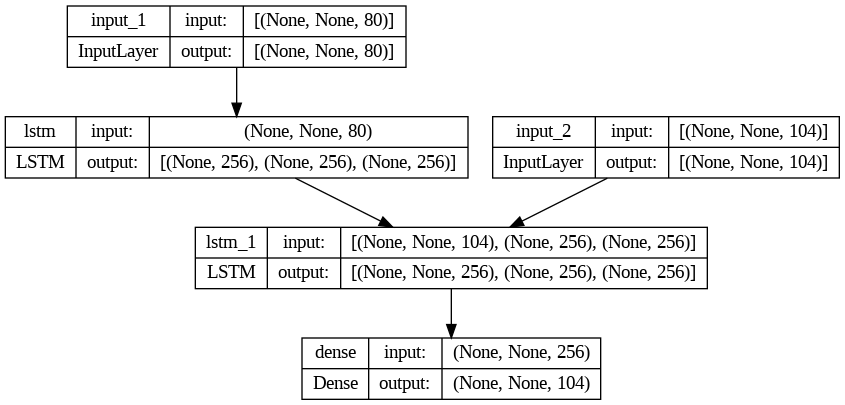

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

<br>

#### 모델 학습

In [ ]:
model.fit(x=[encoder_input, decoder_input], y=decoder_target,
          batch_size=64, epochs=40, validation_split=0.2, verbose=False)

<br>

### seq2seq 기계 번역기 동작
* **seq2seq는 훈련할 때와 동작할 때의 방식이 다름**

<br>

**전체적인 번역 동작 단계**
```
1. 번역하고자 하는 입력 문장이 인코더에 들어가서 은닉 상태와 셀 상태를 얻음
2. 상태와 <SOS>에 해당하는 '\t'를 디코더로 전송
3. 디코더가 <EOS>에 해당하는 '\n'이 나올 때까지 다음 문자를 예측하는 행동을 반복
```


<br>

#### 인코더 정의
- `encoder_inputs`와 `encoder_states`는 훈련 과정에서 이미 정의한 것들을 재사용
  - 훈련 단계에 `encoder_inputs`와 `encoder_states`사이에 있는 모든 층까지 전부 불러옴

In [ ]:
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)

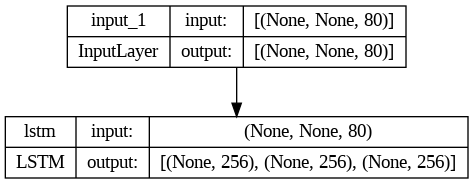

In [ ]:
plot_model(encoder_model, show_shapes=True)

<br>

#### 디코더 정의
- **테스트 단계에서는 디코더를 매 시점 별로 컨트롤해야 하므로,**

  **이전 시점의 상태를 저장하는 객체가 필요**

In [ ]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용.
# 뒤의 함수 decode_sequence()에 동작을 구현 예정
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)

# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태를 버리지 않음.
decoder_states = [state_h, state_c]
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)

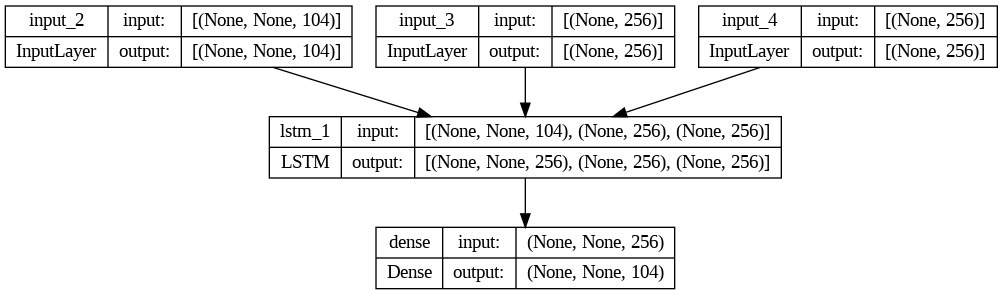

In [ ]:
plot_model(decoder_model, show_shapes=True)

- 단어로부터 인덱스를 얻는 것이 아니라 **인덱스로부터 단어를 얻을 수 있는 `index_to_src와` `index_to_tar`**

In [ ]:
index_to_src = dict((i, char) for char, i in src_to_index.items())
index_to_tar = dict((i, char) for char, i in tar_to_index.items())

<br>

<br>

### 번역기 동작 함수
1. 입력 문장이 들어오면 인코더는 마지막 시점까지 전개하여, 마지막 시점의 은닉 상태와 셀 상태를 리턴
2. 두 개의 값을 `states_value`에 저장
3. 디코더의 초기 입력으로 \<sos\>를 준비 후, `target_seq`에 저장
4. 두 가지 입력을 가지고 반복문으로 진입하여, 이 두가지를 디코더의 입력으로 사용
5. 디코더에 예측에 있어, 현재 시점의 예측 벡터가 `output_tokens`, 현재 시점의 은닉 상태가 `h`, 현재 시점의 셀 상태가 `c`
6. 예측 벡터로부터 현재 시점의 예측 단어인 `target_seq`를 얻고, `h`와 `c`의 값은 `states_value`에 저장
7. 다음 루프에서 디코더에 입력으로 다시 `target_seq`와 `states_value`를 사용
8. 예측 단어로 \<eos\>가 나오거나, 번역 문장의 길이가 50이 넘으면 중단

In [ ]:
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 상태를 얻음
  states_value = encoder_model.predict(input_seq, verbose=False)

  # <SOS>에 해당하는 원-핫 벡터 생성
  target_seq = np.zeros((1, 1, tar_vocab_size))
  target_seq[0, 0, tar_to_index['\t']] = 1.

  stop_condition = False
  decoded_sentence = ""

  # stop_condition이 True가 될 때까지 루프 반복
  while not stop_condition:
    # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
    output_tokens, h, c = decoder_model.predict([target_seq] + states_value, verbose=False)

    # 예측 결과를 문자로 변환
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_char = index_to_tar[sampled_token_index]

    # 현재 시점의 예측 문자를 예측 문장에 추가
    decoded_sentence += sampled_char

    # <eos>에 도달하거나 최대 길이를 넘으면 중단.
    if (sampled_char == '\n' or
        len(decoded_sentence) > max_tar_len):
        stop_condition = True

    # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
    target_seq = np.zeros((1, 1, tar_vocab_size))
    target_seq[0, 0, sampled_token_index] = 1.

    # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
    states_value = [h, c]

  return decoded_sentence

In [ ]:
for seq_index in [3,50,100,300,1001]:
  input_seq = encoder_input[seq_index:seq_index+1]
  decoded_sentence = decode_sequence(input_seq)

  print(35 * "-")
  print('입력 문장:', lines.src[seq_index])
  print('번역 문장:', decoded_sentence[1:len(decoded_sentence)-1]) # '\n'을 빼고 출력

-----------------------------------
입력 문장: Go.
번역 문장: Tu ? 
-----------------------------------
입력 문장: Hello!
번역 문장: Suis Tom. 
-----------------------------------
입력 문장: Got it!
번역 문장: Caps mon chapeau ! 
-----------------------------------
입력 문장: Go home.
번역 문장: Va chez là ? 
-----------------------------------
입력 문장: Get going.
번역 문장: Allez ! 
